<a href="https://colab.research.google.com/github/chuchu-train/pr1/blob/main/DISTILBERT%20MULTICLASS%20CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <u>**Fine Tuning DistilBERT for Multiclass Text Classification**</u>

  MODEL - <Font color = lightblue> 'distilbert-base-uncased'<Font>

<HR FONT COLOR= RED>

### <FONT COLOR = LIGHTGREEN> INSTALL <FONT>

<HR FONT COLOR= RED>
<HR FONT COLOR= RED>

In [ ]:
%%capture
!pip  install transformers

<HR FONT COLOR= RED>

### <FONT COLOR = LIGHTGREEN> DEPENDENCIES <FONT>

<HR FONT COLOR= RED>
<HR FONT COLOR= RED>

In [ ]:
import transformers

In [ ]:
from transformers import DistilBertTokenizer
from transformers import TFDistilBertForSequenceClassification
from transformers import TextClassificationPipeline

import tensorflow as tf
import pandas as pd
import json
import gc

from sklearn.model_selection import train_test_split

import re
import nltk
# from nltk.corpus import stopwords
# nltk.download('stopwords')
# stopw = stopwords.words('english')

import seaborn as sns
import matplotlib.pyplot as plt
from plotly.offline import iplot

from tqdm import tqdm

<HR FONT COLOR= RED>

### <FONT COLOR = LIGHTGREEN> FILE UPLOAD <FONT>

<HR FONT COLOR= RED>
<HR FONT COLOR= RED>

In [ ]:
#to upload files in G_COLAB
from google.colab import files


uploaded = files.upload()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive', force_remount= False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#read data

df = pd.read_csv('/content/ex.csv')
df.head()

,SENTENCES,POKUS NG PANDIWA
0,Si Maria ay nagluto ng masarap na adobo.,POKUS SA TAGAGANAP
1,Kumanta si John sa kasal kahapon.,POKUS SA TAGAGANAP
2,Siya ang nagwagi sa patimpalak na iyon.,POKUS SA TAGAGANAP
3,Ang aking kapatid ay nag-aral nang mabuti para...,POKUS SA TAGAGANAP
4,Naglakad siya sa ilalim ng ulan.,POKUS SA TAGAGANAP


In [ ]:
df.shape

(1359, 2)

<HR FONT COLOR= RED>

### <FONT COLOR = LIGHTGREEN> HISTOGRAM OF THE COUNT OF TEXT <FONT>

<HR FONT COLOR= RED>
<HR FONT COLOR= RED>

In [ ]:
df['count'] = df['SENTENCES'].apply(lambda x: len(x.split()))

In [ ]:
df.head()

,SENTENCES,POKUS NG PANDIWA,count
0,Si Maria ay nagluto ng masarap na adobo.,POKUS SA TAGAGANAP,8
1,Kumanta si John sa kasal kahapon.,POKUS SA TAGAGANAP,6
2,Siya ang nagwagi sa patimpalak na iyon.,POKUS SA TAGAGANAP,7
3,Ang aking kapatid ay nag-aral nang mabuti para...,POKUS SA TAGAGANAP,10
4,Naglakad siya sa ilalim ng ulan.,POKUS SA TAGAGANAP,6


<Figure size 800x800 with 0 Axes>

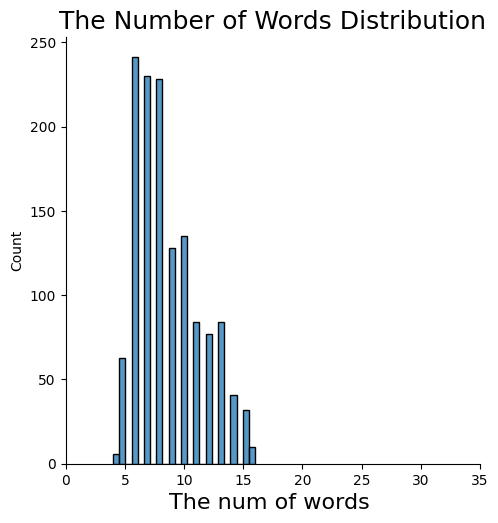

In [ ]:
plt.figure(figsize= (8, 8))

sns.displot(df['count'])

plt.xlim(0, 35)

plt.xlabel('The num of words ', fontsize = 16)
plt.title("The Number of Words Distribution", fontsize = 18)
plt.show()

<HR FONT COLOR= RED>

### <FONT COLOR = LIGHTGREEN> BAR PLOT OF THE NEW CATEGORY <FONT>

<HR FONT COLOR= RED>
<HR FONT COLOR= RED>

In [ ]:
category_count = df['POKUS NG PANDIWA'].value_counts()

categories = category_count.index

categories

Index(['POKUS SA TAGAGANAP', 'POKUS SA LAYON', 'POKUS SA TAGATANGGAP',
       'POKUS SA KAGAMITAN', 'POKUS SA SANHI', 'POKUS SA DIREKSYON',
       'POKUS SA GANAPAN'],
      dtype='object')

In [ ]:
category_count

POKUS SA TAGAGANAP      198
POKUS SA LAYON          198
POKUS SA TAGATANGGAP    198
POKUS SA KAGAMITAN      198
POKUS SA SANHI          198
POKUS SA DIREKSYON      198
POKUS SA GANAPAN        171
Name: POKUS NG PANDIWA, dtype: int64

In [ ]:
category_count.index

Index(['POKUS SA TAGAGANAP', 'POKUS SA LAYON', 'POKUS SA TAGATANGGAP',
       'POKUS SA KAGAMITAN', 'POKUS SA SANHI', 'POKUS SA DIREKSYON',
       'POKUS SA GANAPAN'],
      dtype='object')

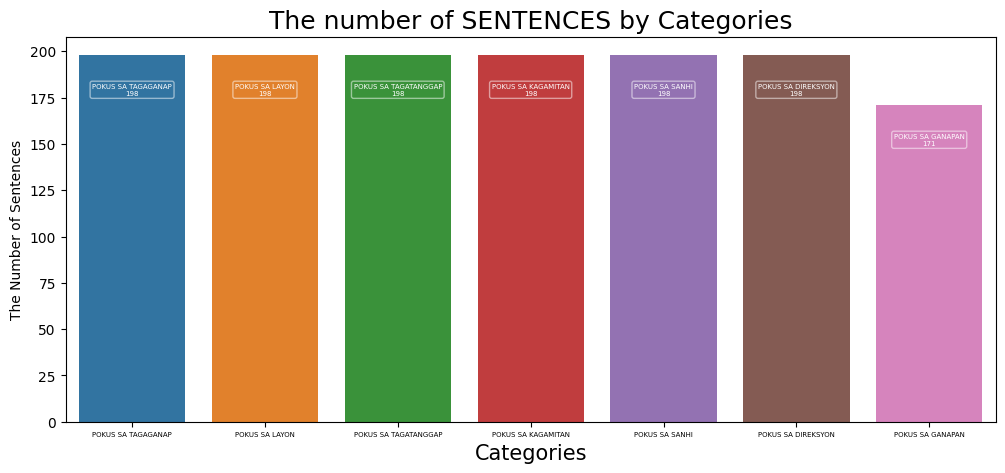

In [ ]:
fig = plt.figure(figsize= (12, 5))

ax = fig.add_subplot(111)

sns.barplot(x = category_count.index, y = category_count )

for a, p in enumerate(ax.patches):
    ax.annotate(f'{categories[a]}\n' + format(p.get_height(), '.0f'), xy = (p.get_x() + p.get_width() / 2.0, p.get_height()), xytext = (0,-25), size = 5, color = 'white' , ha = 'center', va = 'center', textcoords = 'offset points', bbox = dict(boxstyle = 'round', facecolor='none',edgecolor='white', alpha = 0.5) )

plt.xlabel('Categories', size = 15)

plt.ylabel('The Number of Sentences', size= 10)

plt.xticks(size = 5)

plt.title("The number of SENTENCES by Categories" , size = 18)

plt.show()

In [ ]:
df['POKUS NG PANDIWA'].unique()

array(['POKUS SA TAGAGANAP', 'POKUS SA LAYON', 'POKUS SA GANAPAN',
       'POKUS SA TAGATANGGAP', 'POKUS SA KAGAMITAN', 'POKUS SA SANHI',
       'POKUS SA DIREKSYON'], dtype=object)

In [ ]:
df['encoded_text'] = df['POKUS NG PANDIWA'].astype('category').cat.codes

df.head(300)

,SENTENCES,POKUS NG PANDIWA,count,encoded_text
0,Si Maria ay nagluto ng masarap na adobo.,POKUS SA TAGAGANAP,8,5
1,Kumanta si John sa kasal kahapon.,POKUS SA TAGAGANAP,6,5
2,Siya ang nagwagi sa patimpalak na iyon.,POKUS SA TAGAGANAP,7,5
3,Ang aking kapatid ay nag-aral nang mabuti para...,POKUS SA TAGAGANAP,10,5
4,Naglakad siya sa ilalim ng ulan.,POKUS SA TAGAGANAP,6,5
...,...,...,...,...
295,Inihatid niya ang mga kagamitan sa mga biktima...,POKUS SA LAYON,10,3
296,Iniwan niya ang cellphone sa kanyang bahay.,POKUS SA LAYON,7,3
297,Pina-check niya ang lupa sa taniman.,POKUS SA LAYON,6,3
298,Ipinasa niya ang mga papel sa guro.,POKUS SA LAYON,7,3


In [ ]:
data_texts = df['SENTENCES'].to_list()

data_labels = df['encoded_text'].to_list()

<HR FONT COLOR= RED>

### <FONT COLOR = LIGHTGREEN> TRAIN TEST SPLIT <FONT>

<HR FONT COLOR= RED>
<HR FONT COLOR= RED>

In [ ]:
train_texts, val_texts, train_labels, val_labels = train_test_split(data_texts, data_labels, test_size = 0.2, random_state = 0 )


train_texts, test_texts, train_labels, test_labels = train_test_split(train_texts, train_labels, test_size= 0.01, random_state= 0)

<HR FONT COLOR= RED>

### <FONT COLOR = LIGHTGREEN> MODEL DEFINITION <FONT>

<HR FONT COLOR= RED>
<HR FONT COLOR= RED>

In [ ]:
#from transformers import TFAutoModel, AutoModel, AutoTokenizer

# TensorFlow
#   model = TFAutoModel.from_pretrained('jcblaise/distilbert-tagalog-base-cased', from_pt=True)
#   tokenizer = AutoTokenizer.from_pretrained('jcblaise/distilbert-tagalog-base-cased', do_lower_case=False)

# PyTorch
#   model = AutoModel.from_pretrained('jcblaise/distilbert-tagalog-base-cased')
#   tokenizer = AutoTokenizer.from_pretrained('jcblaise/distilbert-tagalog-base-cased', do_lower_case=False)


In [ ]:
# model = TFAutoModel.from_pretrained('jcblaise/distilbert-tagalog-base-cased', from_pt=True)

In [ ]:
# model = TFDistilBertForSequenceClassification.from_pretrained('jcblaise/distilbert-tagalog-base-cased', num_labels=7)

<HR FONT COLOR= RED>


In [ ]:
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')#for eng lang ata

train_encodings = tokenizer(train_texts, truncation = True, padding = True  )

val_encodings = tokenizer(val_texts, truncation = True, padding = True )

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    train_labels
))


val_dataset = tf.data.Dataset.from_tensor_slices((
    dict(val_encodings),
    val_labels
))

<HR FONT COLOR= RED>

### <FONT COLOR = LIGHTGREEN> FINE-TUNING WITH TFT TRAINER CLASS <FONT>

<HR FONT COLOR= RED>
<HR FONT COLOR= RED>

In [ ]:
model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=7)


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_transform.bias']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

In [ ]:
from transformers import TFDistilBertForSequenceClassification, TFTrainer, TFTrainingArguments


training_args = TFTrainingArguments(
    output_dir='./results',
    num_train_epochs=7,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    warmup_steps=500,
    weight_decay=1e-5,
    logging_dir='./logs',
    eval_steps=100
)

with training_args.strategy.scope():
    trainer_model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels = 7 )


trainer = TFTrainer(
    model=trainer_model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_transform.bias']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

In [ ]:
trainer.train()

In [ ]:
trainer.evaluate()

{'eval_loss': 0.2846683025360107}

<HR FONT COLOR= RED>

### <FONT COLOR = LIGHTGREEN> SAVE AND LOADING THE MODEL <FONT>

<HR FONT COLOR= RED>
<HR FONT COLOR= RED>

In [ ]:
save_directory = "/content/save_model_v1"

model.save_pretrained(save_directory)

tokenizer.save_pretrained(save_directory)

('/content/save_model_v1/tokenizer_config.json',
 '/content/save_model_v1/special_tokens_map.json',
 '/content/save_model_v1/vocab.txt',
 '/content/save_model_v1/added_tokens.json')

<HR FONT COLOR= RED>

### <FONT COLOR = LIGHTGREEN> LOAD PRE-TRAINED MODEL <FONT>

<HR FONT COLOR= RED>
<HR FONT COLOR= RED>

In [ ]:
tokenizer_fine_tuned = DistilBertTokenizer.from_pretrained(save_directory)

model_fine_tuned = TFDistilBertForSequenceClassification.from_pretrained(save_directory)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Some layers from the model checkpoint at /content/save_model_v1 were not used when initializing TFDistilBertForSequenceClassification: ['dropout_19']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at /content/save_model_v1 and are newly initialized: ['dropout_59']
You should probably TRAIN this model on a down-stream t

In [ ]:
test_text = test_texts[0]

test_text

'Inabot niya ang donasyon sa mga biktima ng kalamidad.'

In [ ]:
predict_input = tokenizer_fine_tuned.encode(
    test_text,
    truncation = True,
    padding = True,
    return_tensors = 'tf'
)

output = model_fine_tuned(predict_input)[0]

prediction_value = tf.argmax(output, axis = 1).numpy()[0]

prediction_value

4